In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn import preprocessing

ratings = pd.read_csv('./the-movies-dataset/ratings.csv')
notes = ratings['movieId'].groupby([ratings['movieId'], ratings['rating']]).agg({'count'})

In [2]:
rate = []
i=0
while i < len(notes):
    movie_id = notes.index[i][0]
    total = 0
    moyenne = 0
    while i < len(notes) and movie_id == notes.index[i][0]:
        total += notes.iloc[i][0]
        moyenne += notes.iloc[i][0]*notes.iloc[i].name[1]
        i += 1
    rate.append((movie_id, int(moyenne*100/total)/100, total))
average = pd.DataFrame(rate, columns=['movieId', 'rating', 'vote'])

In [3]:
movies = pd.read_csv('./the-movies-dataset/movies_metadata.csv')
movies.drop(columns=['adult', 'belongs_to_collection', 'homepage', 'imdb_id', 'original_language', 'original_title',\
                     'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date',\
                     'spoken_languages', 'status', 'tagline', 'video'], inplace=True)
movies.dropna(inplace=True)
movies['budget'] = movies['budget'].astype('int32')
movies['revenue'] = movies['revenue'].astype('int32')
movies['budget'].replace(to_replace = [0], value=np.nan, inplace=True)
movies['revenue'].replace(to_replace = [0], value=np.nan, inplace=True)
movies['budget'].fillna(np.mean(movies['budget']), inplace = True)
movies['revenue'].fillna(np.mean(movies['revenue']), inplace = True)

/Users/romane/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
links = pd.read_csv('./the-movies-dataset/links.csv')
links.drop(columns=['imdbId'], inplace=True)
links.dropna(inplace=True)
links.tmdbId = links.tmdbId.astype('int64')

In [5]:
movies_ratings = movies.join(links, lsuffix='id', rsuffix='tmbdId')
movies_ratings.drop(columns=['id', 'tmdbId'], inplace=True)
movies_ratings['movieId'].dropna(inplace=True)
movies_ratings = movies_ratings.join(average, lsuffix='movieId', rsuffix='movieID')
movies_ratings.drop(columns=['movieIdmovieId', 'movieIdmovieID'], inplace=True)
movies_ratings.rename(columns={'vote_average':'avg_tmdb', 'vote_count':'count_tmdb', 'rating':'avg_imdb', 'vote':'count_imdb'}, inplace=True)
movies_ratings.dropna(inplace=True)

In [6]:
list_genres_par_films = []
for genres in movies_ratings['genres']:
    genres_list = ast.literal_eval(genres)
    k = [i['name'] for i in genres_list]
    list_genres_par_films.append(k)
movies_ratings['genres'] = list_genres_par_films

one_hot_encode_genres = movies_ratings['genres'].str.join('|').str.get_dummies()
movies_ratings = pd.concat([movies_ratings, one_hot_encode_genres], axis=1)
movies_ratings.drop(columns='genres', inplace=True)

### Normalisation

In [7]:
# x = movies_ratings[['budget', 'popularity','revenue', 'runtime','avg_tmdb', 'count_tmdb', 'avg_imdb', 'count_imdb' ]].values #returns a numpy array
# min_max_scaler = preprocessing.Normalizer()
# x_scaled = min_max_scaler.fit_transform(x)
# df_normalize = pd.DataFrame(x_scaled, columns=['budget', 'popularity','revenue', 'runtime','avg_tmdb', 'count_tmdb', 'avg_imdb', 'count_imdb'])
# movies_ratings[['budget', 'popularity','revenue', 'runtime','avg_tmdb', 'count_tmdb', 'avg_imdb', 'count_imdb' ]] = df_normalize

# Régression linéaire

In [9]:
model = LogisticRegression()
X = movies_ratings[['count_tmdb','Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']]
Y = movies_ratings['avg_tmdb'].astype('int')


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
model.fit(X_train,Y_train)
model.predict(X_train)

print(model.score(X_train, Y_train),'regression train.\n')
print(model.score(X_test,Y_test),'regression test.\n')

/Users/romane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/romane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.4102229299363057 regression train.

0.4047406746916332 regression test.



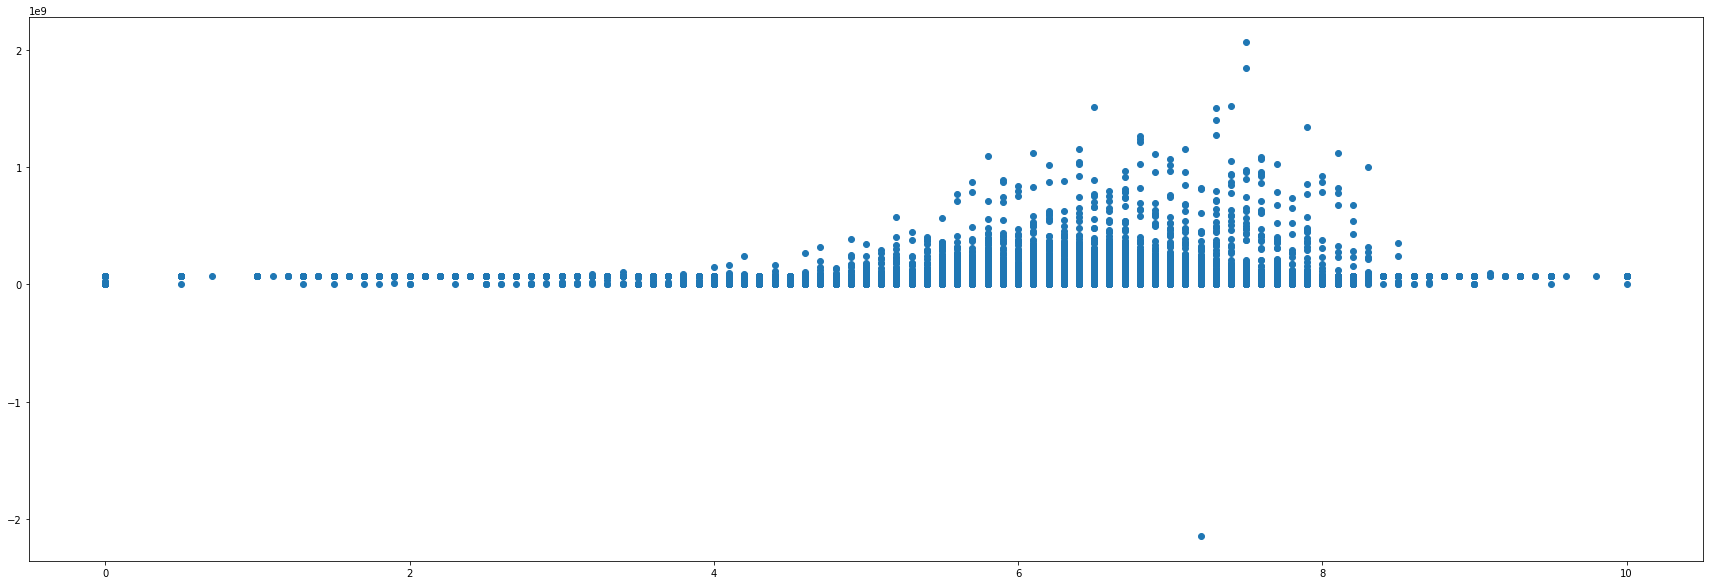

In [10]:
plt.figure(figsize=(30,10))
plt.scatter(movies_ratings['avg_tmdb'].astype('float'), movies_ratings['revenue'])
plt.show()

In [11]:
model = LogisticRegression()
X = movies_ratings[['count_imdb','Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']]
Y = movies_ratings['avg_imdb'].astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
model.fit(X_train,Y_train)
model.predict(X_train)

print(model.score(X_train, Y_train),'regression train.\n')
print(model.score(X_test,Y_test),'regression test.\n')

/Users/romane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/romane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5690127388535032 regression train.

0.5623421013523555 regression test.



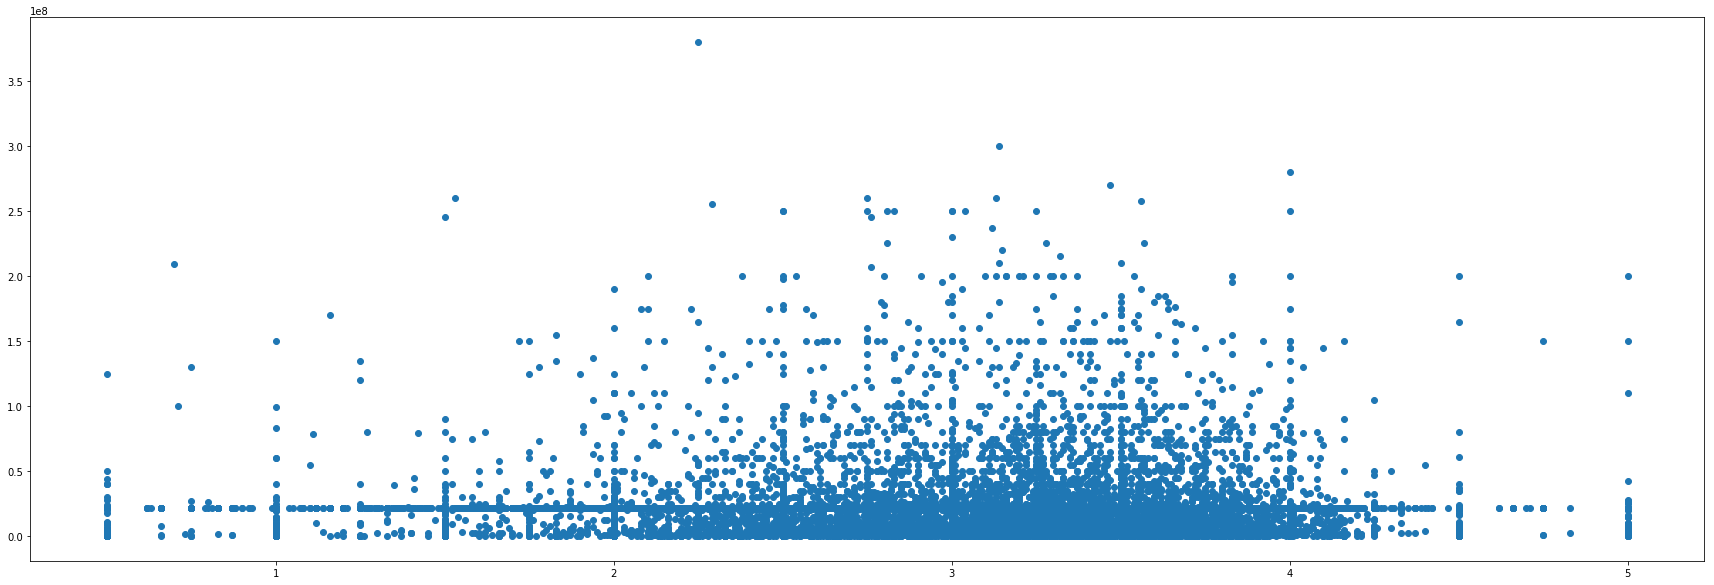

In [15]:
plt.figure(figsize=(30,10))
plt.scatter(movies_ratings['avg_imdb'].astype('float'), movies_ratings['budget'])
plt.show()

In [14]:
model = LogisticRegression()
X = movies_ratings[['count_tmdb','Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']]
Y = movies_ratings['avg_tmdb'].astype('int')

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
model.fit(X_train,Y_train)
model.predict(X_train)

print(model.score(X_train, Y_train),'regression train.\n')
print(model.score(X_test,Y_test),'regression test.\n')

/Users/romane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/romane/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.4086624203821656 regression train.

0.4016941596076683 regression test.

